Random Forest

Taille de chaque groupe :
Label
Fall       42945
Normal    130298
dtype: int64


<ipython-input-4-97cda1c4a6d5>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("Label").apply(


🔹 Rapport de classification :
              precision    recall  f1-score   support

        Fall       0.75      0.78      0.77      8589
      Normal       0.92      0.91      0.91     23513

    accuracy                           0.87     32102
   macro avg       0.84      0.84      0.84     32102
weighted avg       0.88      0.87      0.87     32102



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


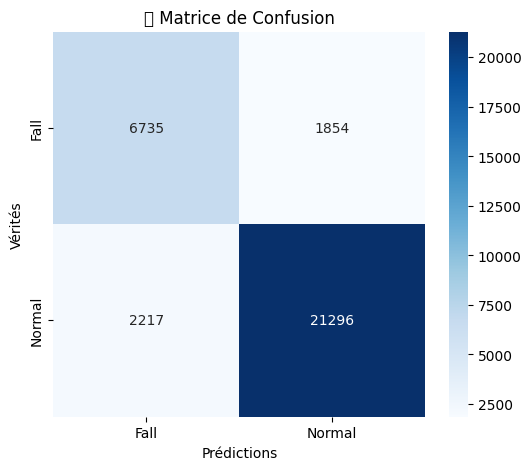

🔹 Modèle sauvegardé avec succès en tant que 'random_forest_model.joblib'


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


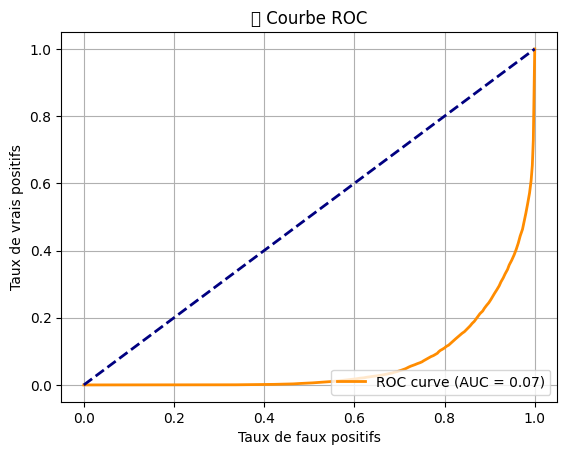

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


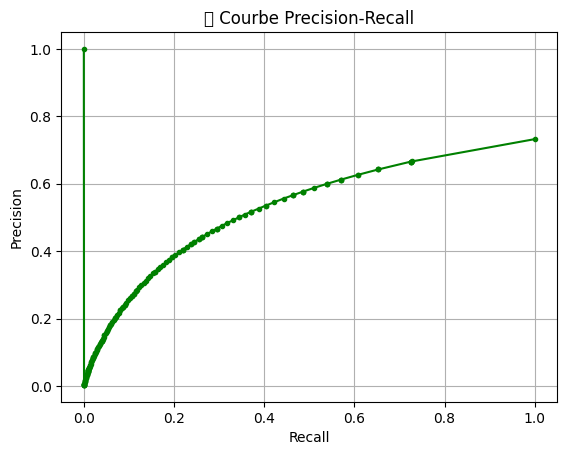

<ipython-input-4-97cda1c4a6d5>:103: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


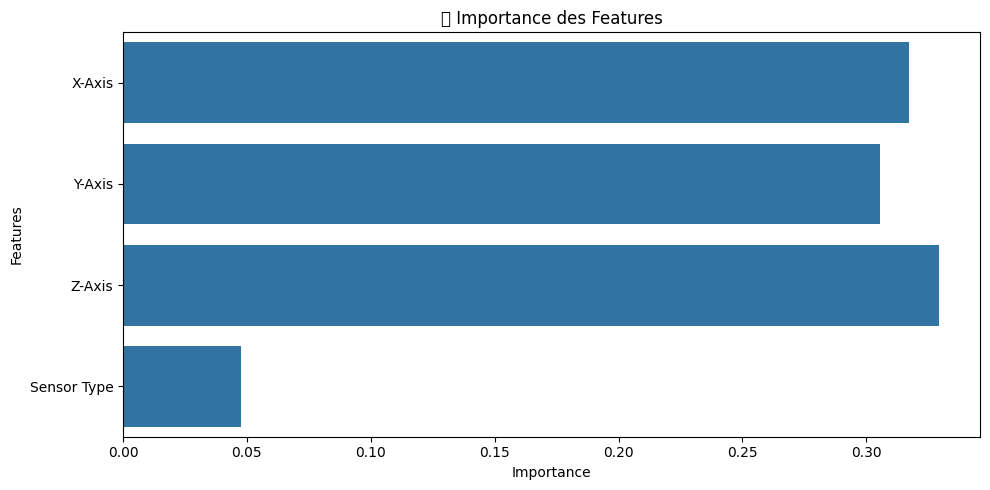

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE

# === 1. Charger les données ===
data = pd.read_csv("binaire.csv")
data = data.dropna()  # Supprimer les valeurs manquantes
data = data.drop(columns=['TimeStamp', 'Sample No', 'Sensor ID'])  # Supprimer les colonnes inutiles

# Vérifier la taille de chaque groupe
print("Taille de chaque groupe :")
print(data.groupby("Label").size())

# Ajuster l'échantillonnage pour chaque groupe en fonction de sa taille
data = data.groupby("Label").apply(
    lambda x: x.sample(n=min(117564, len(x)), random_state=42)
).reset_index(drop=True)

# === 2. Séparer features et labels ===
X = data.drop("Label", axis=1).values  # Features
y = data["Label"].values  # Labels

# === 3. Split train/test stratifié ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === 4. SMOTE sur train set ===
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# === 5. Entraînement du modèle ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# === 6. Prédiction ===
y_pred = model.predict(X_test)

# === 7. Rapport de classification ===
print("🔹 Rapport de classification :")
print(classification_report(y_test, y_pred, labels=model.classes_, zero_division=1))

# === 8. Matrice de confusion ===
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("🔹 Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

# Sauvegarder le modèle
joblib.dump(model, 'random_forest.joblib')
print("🔹 Modèle sauvegardé avec succès en tant que 'random_forest_model.joblib'")

# === 9. Courbe ROC + AUC ===
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()
y_score = model.predict_proba(X_test)[:, list(model.classes_).index("Fall")]  # Assure "Fall" est bien dans les classes

fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("🔹 Courbe ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# === 10. Courbe Precision-Recall ===
precision, recall, _ = precision_recall_curve(y_test_bin, y_score)
plt.figure()
plt.plot(recall, precision, marker='.', color='green')
plt.title('🔹 Courbe Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# === 11. Importance des Features ===
importances = model.feature_importances_
feature_names = data.drop("Label", axis=1).columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("🔹 Importance des Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


random forest amelioré(DATA equilibrée)


Modèle RandomForest sauvegardé en format .joblib.


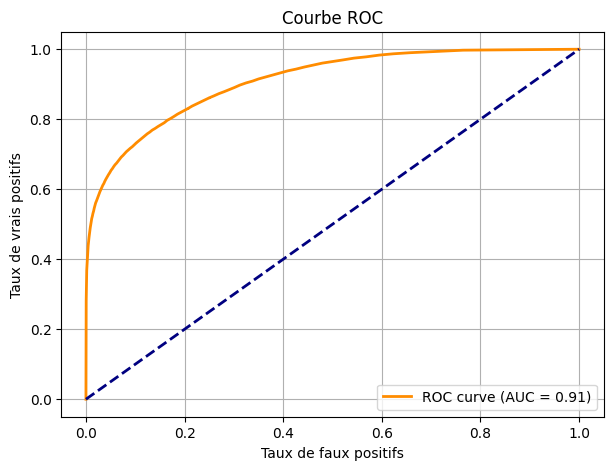

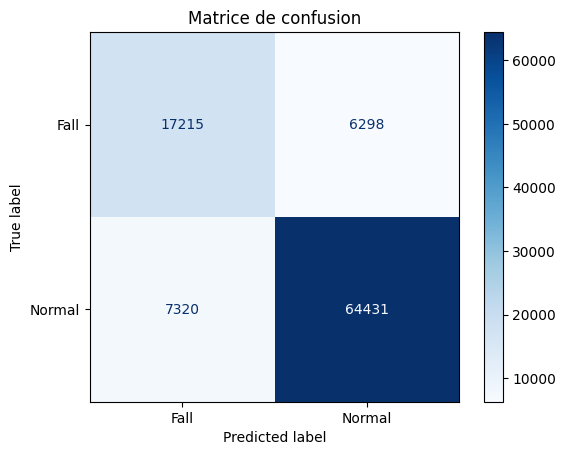

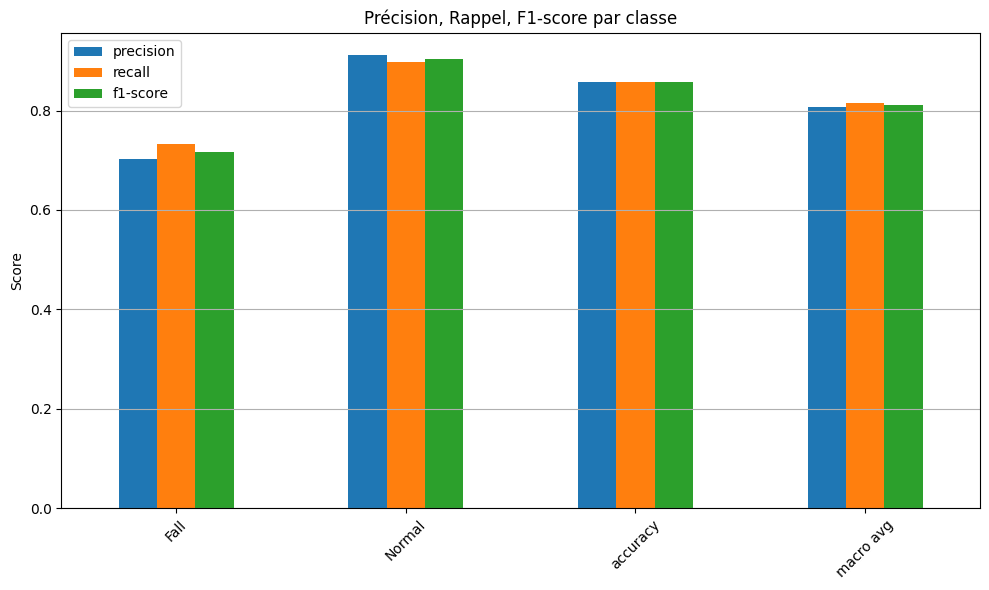


Classification Report:

              precision    recall  f1-score   support

        Fall       0.70      0.73      0.72     23513
      Normal       0.91      0.90      0.90     71751

    accuracy                           0.86     95264
   macro avg       0.81      0.82      0.81     95264
weighted avg       0.86      0.86      0.86     95264



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE
import joblib  # Utiliser joblib pour la sauvegarde du modèle

# 1. Charger et prétraiter les données
data = pd.read_csv("binaire.csv").dropna()
data = data.drop(columns=['TimeStamp', 'Sample No', 'Sensor ID'])

# Équilibrage initial
#data = data.groupby("Label").apply(lambda x: x.sample(n=117564, random_state=42)).reset_index(drop=True)

# Séparer features et labels
X = data.drop("Label", axis=1).values
y = data["Label"].values

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. SMOTE pour équilibrer
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 5. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Sauvegarde du modèle avec joblib (au lieu de .save())
joblib.dump(model, 'random_forest_amelioré.joblib')
print("Modèle RandomForest sauvegardé en format .joblib.")

# Identifier la classe cible pour ROC (ex: "Fall")
target_class = "Fall"
class_index = list(model.classes_).index(target_class)
y_score = y_proba[:, class_index]

# Binarisation des labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# ROC Curve
fpr, tpr, _ = roc_curve((y_test == target_class).astype(int), y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Graphique des métriques (f1, precision, recall)
df_report.iloc[:-1, :3].plot(kind="bar", figsize=(10, 6))
plt.title("Précision, Rappel, F1-score par classe")
plt.ylabel("Score")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage texte
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=1))


random Forest with fitered data acceleration only

Modèle RandomForest sauvegardé en format .joblib.


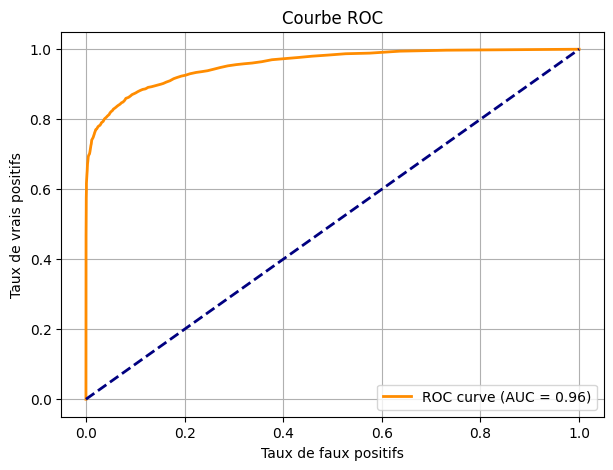

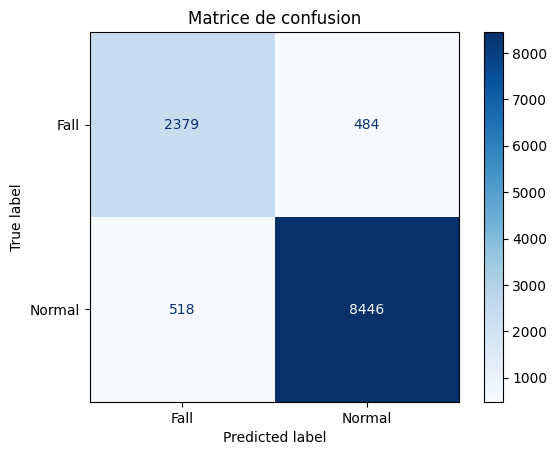

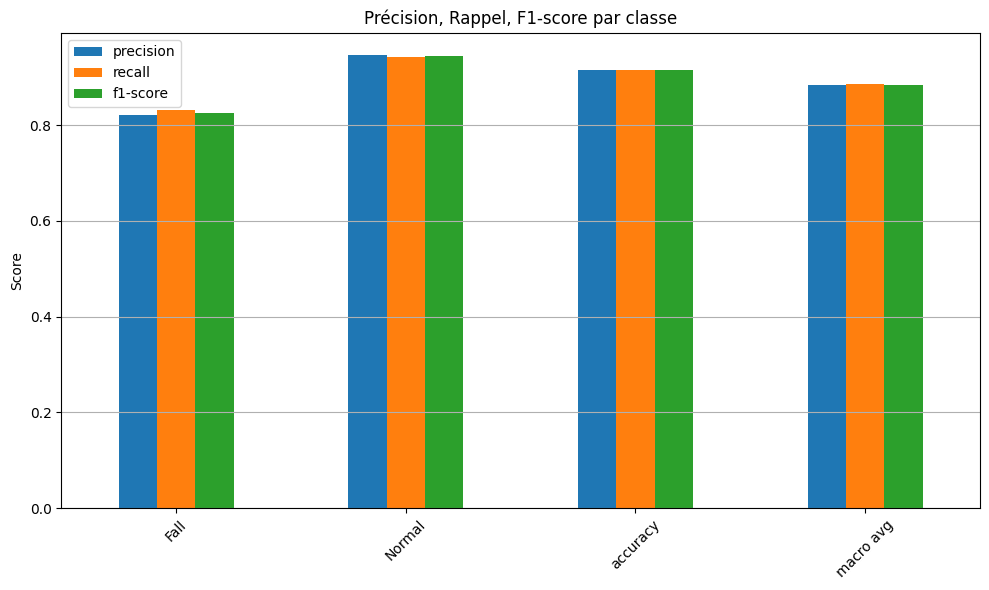


Classification Report:

              precision    recall  f1-score   support

        Fall       0.82      0.83      0.83      2863
      Normal       0.95      0.94      0.94      8964

    accuracy                           0.92     11827
   macro avg       0.88      0.89      0.89     11827
weighted avg       0.92      0.92      0.92     11827



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE
import joblib
data = pd.read_csv("binaire1.csv").dropna()
X = data.drop("Label", axis=1).values
y = data["Label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. SMOTE pour équilibrer
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Sauvegarde du modèle avec joblib (au lieu de .save())
joblib.dump(model, 'random_forest_amelioré_filtered-bin2.joblib')
print("Modèle RandomForest sauvegardé en format .joblib.")

# Identifier la classe cible pour ROC (ex: "Fall")
target_class = "Fall"
class_index = list(model.classes_).index(target_class)
y_score = y_proba[:, class_index]

# Binarisation des labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# ROC Curve
fpr, tpr, _ = roc_curve((y_test == target_class).astype(int), y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Graphique des métriques (f1, precision, recall)
df_report.iloc[:-1, :3].plot(kind="bar", figsize=(10, 6))
plt.title("Précision, Rappel, F1-score par classe")
plt.ylabel("Score")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage texte
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=1))


RNN3

Decision *tree* //XGBoost

<ipython-input-3-5246510828f2>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("Label").apply(lambda x: x.sample(n=117564, random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:29:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Rapport de classification ---
              precision    recall  f1-score   support

        Fall       0.79      0.69      0.74     23513
      Normal       0.73      0.82      0.77     23513

    accuracy                           0.76     47026
   macro avg       0.76      0.76      0.75     47026
weighted avg       0.76      0.76      0.75     47026



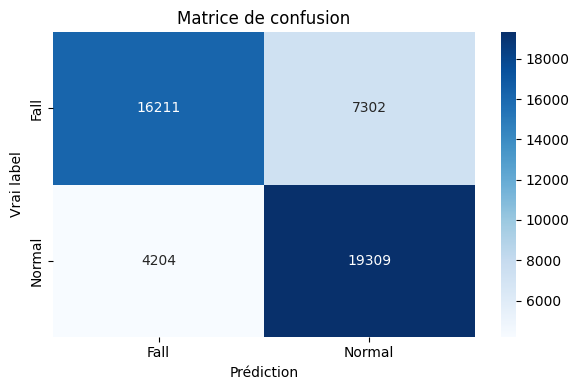

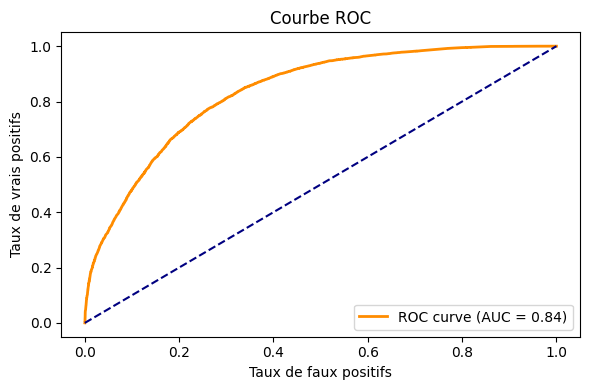

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# 1. Charger les données
data = pd.read_csv("binaire.csv")
data = data.dropna()
data = data.drop(columns=['TimeStamp', 'Sample No', 'Sensor ID'])

# 2. Échantillonnage pour équilibrer les classes
data = data.groupby("Label").apply(lambda x: x.sample(n=117564, random_state=42)).reset_index(drop=True)

# 3. Séparer features et labels
X = data.drop("Label", axis=1).values
y = data["Label"].values

# 🔁 Encodage des labels : "Fall" → 0, "Normal" → 1 (par exemple)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 4. Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 5. Équilibrage des classes avec SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 6. Entraînement du modèle XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    use_label_encoder=False
)

model.fit(X_train_resampled, y_train_resampled)

# 7. Prédictions et évaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n--- Rapport de classification ---")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# 8. Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.tight_layout()
plt.show()

# 9. Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


GradientBoostingClassifier

<ipython-input-13-150fc0c4eb34>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("Label").apply(lambda x: x.sample(n=117564, random_state=42)).reset_index(drop=True)



--- Rapport de classification ---
              precision    recall  f1-score   support

        Fall       0.76      0.65      0.70     23513
      Normal       0.69      0.79      0.74     23513

    accuracy                           0.72     47026
   macro avg       0.72      0.72      0.72     47026
weighted avg       0.72      0.72      0.72     47026



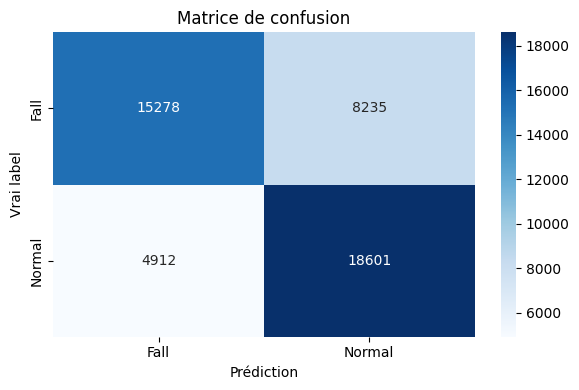

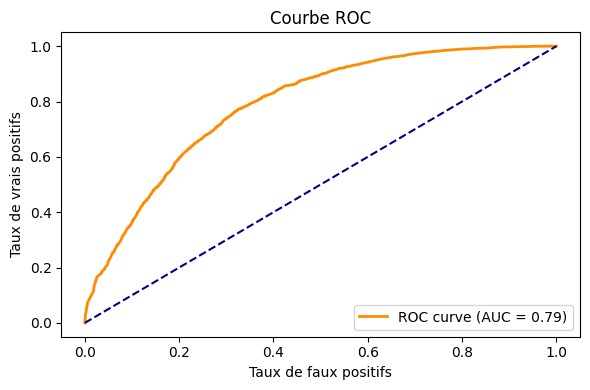

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 1. Charger les données
data = pd.read_csv("binaire.csv")
data = data.dropna()
data = data.drop(columns=['TimeStamp', 'Sample No', 'Sensor ID'])

# 2. Échantillonnage équilibré
data = data.groupby("Label").apply(lambda x: x.sample(n=117564, random_state=42)).reset_index(drop=True)

# 3. Séparer les features et les labels
X = data.drop("Label", axis=1).values
y = data["Label"].values

# 4. Encodage des labels (Fall -> 0, Normal -> 1)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 6. Oversampling avec SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 7. Entraînement du modèle Gradient Boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 8. Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 9. Rapport de classification
print("\n--- Rapport de classification ---")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# 10. Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.tight_layout()
plt.show()

# 11. Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


logistic redgression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# 1. Charger le dataset
df = pd.read_csv("/content/binaire.csv")
df = df.drop(columns=['TimeStamp', 'Sample No', 'Sensor ID'])

# Filtrer les données où 'sensor_type' n'est pas égal à 1 ou 2
data_filtered = data[~data['Sensor Type'].isin([1, 2])]
# 2. Préparer les features et labels
X = df[['X-Axis', 'Y-Axis', 'Z-Axis','Sensor Type']]
y = df['Label']

# 3. Split (en ajoutant 'stratify' pour maintenir les proportions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Appliquer le rééchantillonnage (oversampling) pour équilibrer les classes
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# 5. Entraîner le modèle avec les données rééchantillonnées
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

# 6. Évaluer le modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 7. Extraire les poids
weights = model.coef_[0]   # tableau [w1, w2, w3]
bias = model.intercept_[0]

print("Poids :", weights)
print("Biais :", bias)


              precision    recall  f1-score   support

        Fall       0.33      0.47      0.38     53594
      Normal       0.77      0.64      0.70    145088

    accuracy                           0.59    198682
   macro avg       0.55      0.56      0.54    198682
weighted avg       0.65      0.59      0.61    198682

Poids : [-0.00297222 -0.00179357 -0.00257248 -0.12091141]
Biais : 0.03706687553188597


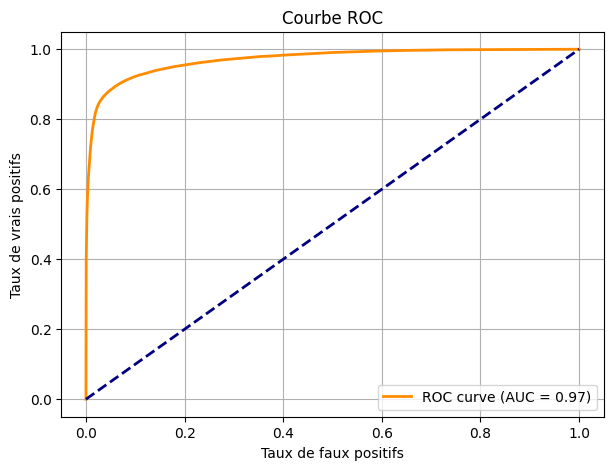

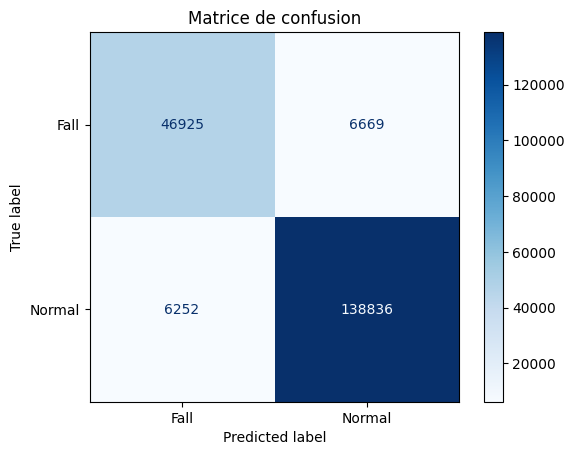

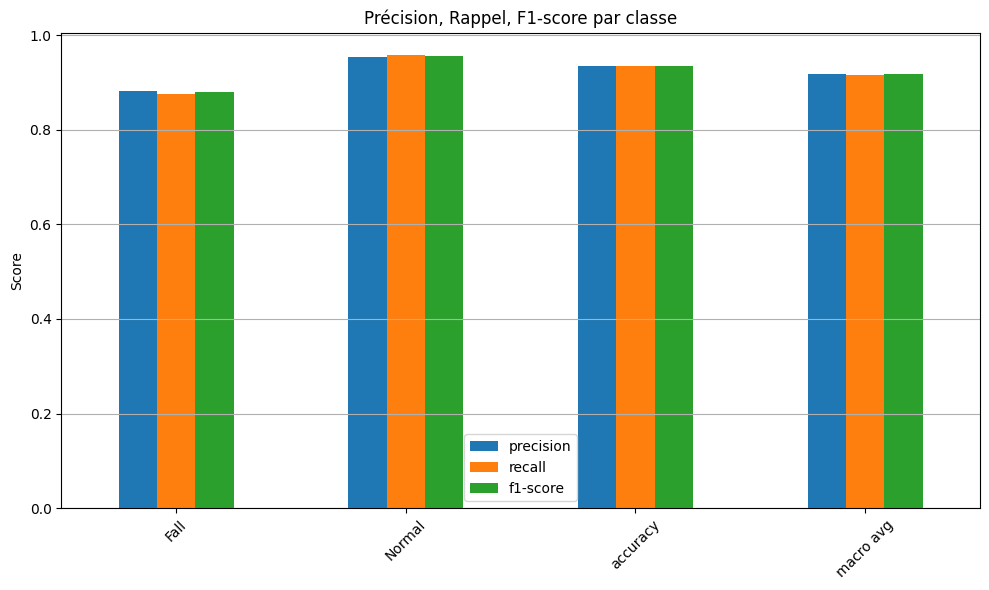


Classification Report:

              precision    recall  f1-score   support

        Fall       0.88      0.88      0.88     53594
      Normal       0.95      0.96      0.96    145088

    accuracy                           0.93    198682
   macro avg       0.92      0.92      0.92    198682
weighted avg       0.93      0.93      0.93    198682



In [ ]:
########RANDOM FOREST
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE

# 1. Charger et prétraiter les données
data = pd.read_csv("binaire.csv").dropna()
data = data.drop(columns=['TimeStamp', 'Sample No', 'Sensor ID'])

# Équilibrage initial
#data = data.groupby("Label").apply(lambda x: x.sample(n=117564, random_state=42)).reset_index(drop=True)

# Séparer features et labels
X = data.drop("Label", axis=1).values
y = data["Label"].values

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. SMOTE pour équilibrer
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 5. Prédiction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Identifier la classe cible pour ROC (ex: "Fall")
target_class = "Fall"
class_index = list(model.classes_).index(target_class)
y_score = y_proba[:, class_index]

# Binarisation des labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# ROC Curve
fpr, tpr, _ = roc_curve((y_test == target_class).astype(int), y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Graphique des métriques (f1, precision, recall)
df_report.iloc[:-1, :3].plot(kind="bar", figsize=(10, 6))
plt.title("Précision, Rappel, F1-score par classe")
plt.ylabel("Score")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage texte
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=1))